Jiajun Du CS5661 FACE project

In [2]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline

# #A Read image and plot

In [4]:
i=0

In [5]:
a = mpimg.imread('/Users/thp/Documents/CSULA/5661 Data Science/hw3/HW3/Face/'+str(i)+'.jpg')

In [6]:
a

array([[186, 183, 179, ...,  25,  63,  71],
       [183, 183, 181, ...,  31,  34,  68],
       [179, 184, 185, ...,  48,   9,  59],
       ..., 
       [ 32,  27,  23, ...,   3,   3,   4],
       [ 26,  28,  24, ...,   5,   2,   4],
       [ 18,  29,  33, ...,   9,   3,   5]], dtype=uint8)

In [8]:
a.size

4096

In [12]:
label.head()

,Label
0,13
1,30
2,34
3,19
4,24


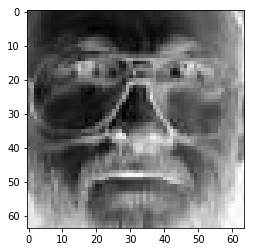

In [13]:
#ploting the image
plt.imshow(a, cmap=plt.cm.gray_r, interpolation='nearest')

# #B build feature matrix

In [14]:
a[0]

array([186, 183, 179, 190, 212, 219, 221, 232, 230, 231, 233, 234, 233,
       230, 228, 226, 230, 229, 230, 231, 233, 233, 232, 231, 227, 229,
       227, 224, 224, 229, 232, 230, 228, 227, 221, 215, 217, 222, 221,
       214, 212, 206, 198, 192, 189, 185, 179, 174, 173, 169, 165, 165,
       165, 161, 152, 144, 135, 117, 100, 102,  56,  25,  63,  71], dtype=uint8)

In [16]:
a[0].size

64

In [17]:
col = np.append(a[0],a[1])

In [18]:
col

array([186, 183, 179, 190, 212, 219, 221, 232, 230, 231, 233, 234, 233,
       230, 228, 226, 230, 229, 230, 231, 233, 233, 232, 231, 227, 229,
       227, 224, 224, 229, 232, 230, 228, 227, 221, 215, 217, 222, 221,
       214, 212, 206, 198, 192, 189, 185, 179, 174, 173, 169, 165, 165,
       165, 161, 152, 144, 135, 117, 100, 102,  56,  25,  63,  71, 183,
       183, 181, 193, 214, 221, 222, 233, 235, 234, 233, 232, 230, 228,
       226, 225, 229, 231, 234, 237, 238, 235, 230, 227, 229, 230, 228,
       223, 223, 227, 229, 228, 225, 227, 225, 219, 217, 220, 219, 215,
       211, 208, 204, 201, 198, 191, 181, 173, 170, 166, 162, 163, 165,
       163, 157, 150, 134, 127, 104,  99,  77,  31,  34,  68], dtype=uint8)

In [19]:
col.size

128

In [22]:
#create one vector for one image
for x in range (2,64):
    col = np.append(col,a[x])

In [23]:
col.size

4096

In [28]:
#creating a dataFrame for the images
images = pd.DataFrame(data=col, columns=['0'])

In [34]:
images.size

4096

In [35]:
#use a loop to include all images as different columns into above dataFrame

for i in range(1,400):
    b = mpimg.imread('/Users/thp/Documents/CSULA/5661 Data Science/hw3/HW3/Face/'+str(i)+'.jpg')
    col = np.append(b[0],b[1])
    for x in range (2,64):
        col = np.append(col,b[x])
    images[str(i)]=col
    
images.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,186,204,86,61,99,44,120,111,158,26,...,22,106,53,33,69,19,109,163,145,91
1,183,198,79,90,134,58,168,126,162,46,...,25,120,77,39,58,13,145,177,147,74
2,179,194,82,98,165,92,184,161,168,69,...,16,135,106,54,47,7,182,193,151,66
3,190,195,95,119,183,98,185,200,174,84,...,33,147,132,99,75,7,196,202,160,74
4,212,198,100,144,201,176,184,220,180,96,...,59,160,151,155,142,14,195,211,178,80


In [38]:
#make the feature matrix cooridnate with the dimensions of the label 
feature = images.T

feature.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


# #C Normalize feature matrix

In [87]:
from sklearn import preprocessing

In [88]:
feature_scaled = preprocessing.scale(df)

In [90]:
feature_scaled

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ..., 
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

# #D split the into train and test data set

In [53]:
label = pd.read_csv('/Users/thp/Documents/CSULA/5661 Data Science/hw3/HW3/Face/label.csv')

In [55]:
label.head()

,Label
0,13
1,30
2,34
3,19
4,24


In [57]:
label.size

400

In [91]:
#spliting data accroding to the assignment
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=5)

# #E use PCA to do dimentionality reduction

In [59]:
from sklearn.decomposition import PCA

In [60]:
k=50

In [92]:
my_pca = PCA(n_components = k)
X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)

In [126]:
X_train_new.shape

(300, 50)

In [127]:
X_test_new.shape

(100, 50)

In [168]:
y_new = pd.concat([y_train,y_test])

In [169]:
y_new.shape

(400, 1)

# #F Use non-linear SVM classifier 

In [75]:
from sklearn.svm import SVC

In [96]:
my_SVM = SVC(C=1,kernel='rbf',gamma=0.0005,random_state=1)

In [103]:
my_SVM.fit (X_train_new, y_train)

/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
y_predict = my_SVM.predict (X_test_new)

In [113]:
#check accuracy

score_SVM= accuracy_score(y_test, y_predict)
print(score_SVM)

0.91


In [125]:
#Confusion Matrix

cm_SVM = metrics.confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm_SVM)


Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


# #Grid Search for best C

In [129]:
#merging X dataset
X_1 = pd.DataFrame(X_train_new)
X_1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-47.809943,-6.740401,-7.059032,-13.358404,3.596551,5.422508,2.024244,-3.179284,0.162218,9.078747,...,-1.939826,1.535555,-2.039797,0.007505,-0.879569,0.164485,0.764081,-0.271724,-0.695205,-2.857248
1,-23.305562,-8.885534,-8.401887,6.476879,-16.263499,7.027839,13.273875,-7.268944,-11.486012,-9.205332,...,-3.506991,-2.544114,3.029185,2.048242,1.406387,1.723723,1.970565,-0.900823,2.732383,4.149932
2,26.314219,4.819515,6.812379,-5.477064,-0.820429,18.277638,-14.548281,15.270040,9.247623,-15.626613,...,-3.790689,-2.341853,-0.251964,0.006289,1.205211,2.063184,4.387013,0.301497,-1.712293,2.821635
3,8.266427,4.638028,3.078472,25.603084,1.841109,-14.817230,6.585413,-14.831167,16.129436,-18.394316,...,5.574942,1.499172,5.284085,1.255470,2.104812,2.541426,6.643783,0.297252,-1.874799,-1.507284
4,-45.410689,-7.332661,-17.590844,-0.655902,0.724138,-9.391717,-4.122996,-15.027983,11.394380,6.770605,...,-1.500290,2.985739,-1.414876,-0.433177,-3.602009,2.118484,0.614128,-1.386217,2.087544,1.716793


In [130]:
X_2 = pd.DataFrame(X_test_new)
X_2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4.223422,-59.430047,3.250010,10.228930,-4.364699,-2.121271,6.548920,-5.269205,-9.234114,2.121419,...,-3.981832,0.194879,2.654941,-0.910128,5.973251,-0.547489,1.792037,-0.646041,1.030325,2.697738
1,51.078981,-30.859767,-4.917374,-21.213531,15.904366,-11.228930,9.522003,-1.307004,0.269557,2.492793,...,-1.342163,-3.581673,2.191673,1.222670,0.347387,-3.472732,1.148539,-1.657547,4.201634,0.434775
2,-46.294452,-23.566680,-1.339628,-0.625463,13.818934,-17.979491,-2.888877,4.903274,8.335134,-3.224663,...,3.980995,-1.807127,1.260469,-2.566836,-1.316646,0.897251,1.775728,-5.717638,3.047302,-3.554918
3,-31.162143,-17.600575,-11.222512,5.842147,-15.126561,-0.229525,2.785043,2.302301,-15.255072,3.621276,...,-3.338809,-2.908970,1.377407,3.534389,-0.358815,-1.082872,1.147568,0.869450,2.820384,-1.203750
4,-2.094782,20.679116,-13.582743,-25.525720,-6.117823,-3.478038,-9.557178,4.745901,11.651558,0.617689,...,-2.716388,4.968317,1.597360,2.176121,0.929713,2.753183,-2.463614,-1.623455,-2.325488,-0.025298


In [172]:
X_new = pd.concat([X_1,X_2])

In [145]:
X_new_df = pd.concat(X_new)
X_new_df.shape

(400, 50)

In [ ]:
#Grid Search 

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [160]:
param_grid = {
    'kernel':('linear','rbf'),
    'C':[0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
    
}

In [161]:
grid = GridSearchCV(my_SVM, param_grid,cv=10,scoring ='accuracy')

In [170]:
grid.fit(X_new_df, y_new)

/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [171]:
print(grid.best_score_)
print(grid.best_params_)

0.9775
{'C': 0.1, 'kernel': 'linear'}
